# CHAPTER 03 파이토치로 구현하는 ANN

필요한 라이브러리 설치유무 확인

In [1]:
from importlib import import_module

required_packages = [
    ("torch", "파이토치"),
    ("torchvision", "토치비전"),
    ("torchtext", "토치텍스트"),
    ("numpy", "넘파이"), 
    ("matplotlib", "맷플롯립"),
    ("sklearn", "사이킷런"),
]
installed_packages = []
uninstalled_packages = []

def run():
    is_ready = True
    for package_name, korean_name in required_packages:
        printed_name = "%s(%s)" % (korean_name, package_name)
        try:
            imported_package = import_module(package_name)
            installed_packages.append("%s 버전:%s" % (printed_name, imported_package.__version__))
        except:
            is_ready = False
            uninstalled_packages.append(printed_name)

    if is_ready:
        print("축하합니다! 3분 딥러닝 파이토치맛 예제 실행을 위한 환경설정이 끝났습니다.")
        print("설치된 라이브러리 정보:")
        for pkg in installed_packages:
            print(" * " + pkg)
    else:
        print("미설치된 라이브러리가 있습니다.")
        print("설치된 라이브러리 정보:")
        for pkg in installed_packages:
            print(" * " + pkg)
        print("미설치된 라이브러리 정보:")
        for pkg in uninstalled_packages:
            print(" * " + pkg)
    return is_ready 


if __name__ == "__main__":
    run()

축하합니다! 3분 딥러닝 파이토치맛 예제 실행을 위한 환경설정이 끝났습니다.
설치된 라이브러리 정보:
 * 파이토치(torch) 버전:1.10.0+cu111
 * 토치비전(torchvision) 버전:0.11.1+cu111
 * 토치텍스트(torchtext) 버전:0.11.0
 * 넘파이(numpy) 버전:1.19.5
 * 맷플롯립(matplotlib) 버전:3.2.2
 * 사이킷런(sklearn) 버전:1.0.1


## 3.1 텐서와 Autograd

In [2]:
import torch    # 파이토치 import

#### 텐서의 차원 다루기

In [3]:
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
print(x)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [4]:
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


In [5]:
# 랭크 늘리기
x = torch.unsqueeze(x, 0)  # 0번째 차원에 1이라는 차원값 추가
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
Size: torch.Size([1, 3, 3])
Shape: torch.Size([1, 3, 3])
랭크(차원): 3


In [6]:
# 랭크 줄이기
x = torch.squeeze(x)    # 크기가 1인 랭크를 삭제하여 다시 랭크 2 텐서로 되돌리기
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


In [7]:
# 텐서의 모양 바꾸기
x = x.view(9)   # reshape와 유사
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
Size: torch.Size([9])
Shape: torch.Size([9])
랭크(차원): 1


In [8]:
# view()함수로 텐서의 원소 개수를 바꿀 수는 없다
try:
    x = x.view(2,4)
except Exception as e:
    print(e)

shape '[2, 4]' is invalid for input of size 9


#### 텐서를 이용한 연산과 행렬곱

In [9]:
# 행렬 생성
w = torch.randn(5,3, dtype=torch.float)
x = torch.tensor([[1.0,2.0], [3.0,4.0], [5.0,6.0]])
print("w size:", w.size())
print("x size:", x.size())
print("w:", w)
print("x:", x)

w size: torch.Size([5, 3])
x size: torch.Size([3, 2])
w: tensor([[-0.2079,  0.4629, -0.6851],
        [ 0.3074, -0.5776, -0.3191],
        [ 0.1037,  0.7710,  0.3888],
        [-0.1763, -0.6696, -1.1678],
        [ 0.9239, -0.2843,  0.1471]])
x: tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [10]:
b = torch.randn(5,2, dtype=torch.float)
print("b size:", b.size())
print("b:", b)

b size: torch.Size([5, 2])
b: tensor([[-0.5311,  0.1906],
        [ 0.3452,  0.2493],
        [-1.8844, -0.6733],
        [ 1.7809,  0.8599],
        [ 0.6813, -1.0641]])


In [11]:
wx = torch.mm(w,x)  # torch.mm(A,B) -> A와 B의 행렬곱
print("wx size:", wx.size())
print("wx:", wx)

wx size: torch.Size([5, 2])
wx: tensor([[ -2.2449,  -2.6751],
        [ -3.0208,  -3.6100],
        [  4.3609,   5.6245],
        [ -8.0242, -10.0378],
        [  0.8063,   1.5929]])


In [12]:
result = wx + b
print("result size:", result.size())
print("result:", result)

result size: torch.Size([5, 2])
result: tensor([[-2.7761, -2.4845],
        [-2.6755, -3.3607],
        [ 2.4766,  4.9512],
        [-6.2433, -9.1780],
        [ 1.4876,  0.5289]])


#### Autograd

- Atutograd : 수식의 기울기를 자동으로 계산 (자동 미분)

In [13]:
# requires_grad=True로 설정하면 Autograd 기능이 자동으로 계산할 때 미분값을 w.grad에 저장한다
w = torch.tensor(1.0, requires_grad=True)
a = w*3
l = a**2

$l = a^2 = (3w)^2 = 9w^2$

위 수식에서 $l$을 $w$로 미분해보자.

In [14]:
l.backward()    # 연쇄법칙을 이용해서 a와 w로 차례대로 미분
print(f"l을 w로 미분한 값은 {format(w.grad)}")  # w.grad에 미분값이 저장되어 있다

l을 w로 미분한 값은 18.0


## 3.2 경사하강법으로 이미지 복원하기

이미지 처리 함수 ( weird_function() )에 버그가 들어가서 생성된 오염된 이미지 복원하기

1. 오염된 이미지와 크기가 같은 랜덤 텐서 생성.
2. weird_function(랜덤 텐서) --> 오염된 이미지라고 가정
3. 가정한 이미지와 실제 오염된 이미지의 오차가 최소화되도록 모델 훈련 (경사하강법 사용)

In [15]:
import pickle
import matplotlib.pyplot as plt

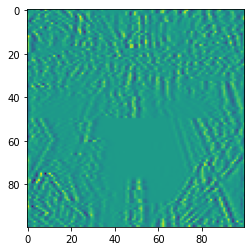

In [16]:
# 오염된 이미지 읽어오기
path = "/content/drive/MyDrive/3-min-pytorch/3-min-pytorch-master/03-파이토치로_구현하는_ANN"
broken_image = torch.FloatTensor(pickle.load(open(f"{path}/broken_image_t.p", 'rb'), encoding='latin1'))
plt.imshow(broken_image.view(100,100))  # 100 x 100으로 크기 변환 후 시각화

In [17]:
# 이미지를 오염시키는 함수
def weird_function(x, n_iter=5):
    h = x
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat((zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0)
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat((h[h.shape[0]//2:], h[:h.shape[0]//2]), 0)
    return h

In [18]:
# 무작위 텐서를 weird_function()에 입력한 텐서와 오염된 이미지 사이의 오차를 구하는 함수
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)  # torch.dist(): 두 텐서 사이의 거리를 구하는 함수

In [19]:
# broken_image와 같은 모양과 랭크를 지닌 텐서 생성
random_tensor = torch.randn(10000, dtype=torch.float)

In [20]:
lr = 0.8    # 학습률 설정

for i in range(0,20000): # 경사하강법 20,000번 반복
    random_tensor.requires_grad_(True)  # 오차함수를 random_tensor로 미분해야하므로 requires_grad를 True로 설정
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():  # 자동 기울기 계산 비활성화
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 12.358031272888184
Loss at 1000 = 1.1733558177947998
Loss at 2000 = 0.5534371137619019
Loss at 3000 = 0.3831740617752075
Loss at 4000 = 0.30397868156433105
Loss at 5000 = 0.2552907466888428
Loss at 6000 = 0.22009852528572083
Loss at 7000 = 0.19205665588378906
Loss at 8000 = 0.16828903555870056
Loss at 9000 = 0.1472807377576828
Loss at 10000 = 0.1281486600637436
Loss at 11000 = 0.11034387350082397
Loss at 12000 = 0.09350966662168503
Loss at 13000 = 0.07740496098995209
Loss at 14000 = 0.061862584203481674
Loss at 15000 = 0.04676396772265434
Loss at 16000 = 0.03202643245458603
Loss at 17000 = 0.021139949560165405
Loss at 18000 = 0.0211650263518095
Loss at 19000 = 0.021167170256376266


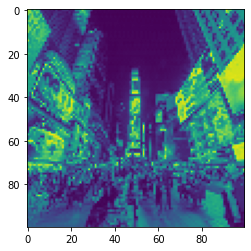

In [21]:
# 경사하강법을 20,000번 반복해 복원한 이미지
plt.imshow(random_tensor.view(100,100).data)

원본이미지는 뉴욕 타임스퀘어의 풍경이었다!

## 3.3 신경망 모델 구현하기

- 인공신경망 (ANN)

 입력층, 은닉층을 지나 출력층으로 전달
 
 1. 각 층에 존재하는 **가중치**에 행렬곱시키고 **편향** 더해줌

 2. 이 행렬곱의 결과는 **활성화 함수**를 거쳐서 인공뉴런의 결괏값을 출력
 
 3. 이 과정을 층마다 반복 ...

 4. 결괏값과 정답을 비교해 오차를 계산 --> 역전파

 역전파 : 겹겹이 쌓인 가중치를 뒤에서부터 차례대로 조정, 최적화하는 알고리즘

#### 간단한 분류 모델 구현하기

In [22]:
from sklearn.datasets import make_blobs
import numpy

In [23]:
# 학습과 평가에 사용할 데이터셋 생성
n_dim = 2

# make_blobs: 무작위 클러스터 데이터 생성
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                              shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                            shuffle=True, cluster_std=0.3)

In [24]:
# 생성한 클러스터가 4개이므로 분류를 하기위해서 4개를 2개로 합치자
def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0, 1], 0) # 0,1 -> 0 로 
y_train = label_map(y_train, [2, 3], 1) # 2,3 -> 1 로
y_test = label_map(y_test, [0, 1], 0)   
y_test = label_map(y_test, [2, 3], 1)

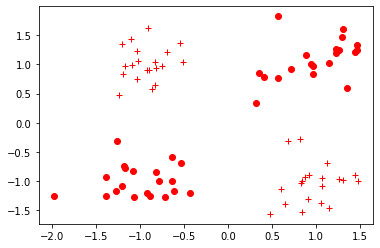

In [25]:
# 생성한 데이터셋 시각화
def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

# 0은 'o'로, 1은 '+'로 표시

In [26]:
# 넘파이 벡터 형식 데이터를 파이토치 텐서로 변환
x_train = torch.FloatTensor(x_train)
print(f"x_train.shape: {x_train.shape}")
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
print(f"y_train.shape: {y_train.shape}")
y_test = torch.FloatTensor(y_test)

x_train.shape: torch.Size([80, 2])
y_train.shape: torch.Size([80])


In [27]:
# 신경망 모델 정의
class NeuralNet(torch.nn.Module):  # 신경망은 보통 torch.nn.Module을 상속받는 파이썬 클래스로 정의한다.
        def __init__(self, input_size, hidden_size): # 입력층 크기, 은닉층 크기 입력받아서 생성
            super(NeuralNet, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size
            # torch.nn.Linear: 행렬곱과 편향을 포함하는 연산을 지원하는 객체 반환
            self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
            self.relu = torch.nn.ReLU()
            self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
            self.sigmoid = torch.nn.Sigmoid()
            
        def forward(self, input_tensor):
            linear1 = self.linear_1(input_tensor)
            relu = self.relu(linear1)
            linear2 = self.linear_2(relu)
            output = self.sigmoid(linear2)  # 0과 1사이의 임의의 수로 제한해준다
            return output

In [28]:
model = NeuralNet(2, 5) # input_size=2, hidden_size=5
learning_rate = 0.03    # 학습률 설정
criterion = torch.nn.BCELoss()  # 오차함수 (이진 교차 엔트로피)

epochs = 2000   # 에폭 설정
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # 확률적경사하강법 적용

In [29]:
# 학습을 하지 않은 모델 성능 평가
model.eval()    # 평가모드
test_loss_before = criterion(model(x_test).squeeze(), y_test)   # 오차
print('Before Training, test loss is {}'.format(test_loss_before.item()))   # tensor.item(): 텐서를 스칼라값으로 반환

Before Training, test loss is 0.6875074505805969


In [30]:
for epoch in range(epochs):
    model.train()   # 학습모드로 변경
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    if epoch % 100 == 0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.6908473968505859
Train loss at 100 is 0.5991116762161255
Train loss at 200 is 0.5215147733688354
Train loss at 300 is 0.4427294135093689
Train loss at 400 is 0.35892945528030396
Train loss at 500 is 0.28786781430244446
Train loss at 600 is 0.23676738142967224
Train loss at 700 is 0.20071005821228027
Train loss at 800 is 0.17357996106147766
Train loss at 900 is 0.15283113718032837
Train loss at 1000 is 0.13602064549922943
Train loss at 1100 is 0.12214551866054535
Train loss at 1200 is 0.11080716550350189
Train loss at 1300 is 0.10159403085708618
Train loss at 1400 is 0.09384103119373322
Train loss at 1500 is 0.08717779070138931
Train loss at 1600 is 0.08134938776493073
Train loss at 1700 is 0.07620716840028763
Train loss at 1800 is 0.07163752615451813
Train loss at 1900 is 0.06756048649549484


In [31]:
# 훈련 후 모델 성능 평가
model.eval()    # 평가 모드로 변경
test_loss = criterion(torch.squeeze(model(x_test)), y_test)
print(f"After Training, test loss is {test_loss.item()}")

After Training, test loss is 0.03623988479375839


In [32]:
# 학습된 모델 저장
torch.save(model.state_dict(), f"{path}/model.pt")
print(f"state_dict format of the model: {model.state_dict()}") # state_dict(): {연산이름: 가중치텐서 & 편향텐서}로 구성

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[-1.3383, -0.7029],
        [ 1.4221,  2.0004],
        [-1.5466, -0.8738],
        [ 0.4629,  0.6485],
        [-1.4238,  1.3692]])), ('linear_1.bias', tensor([-0.0741, -0.2588, -0.1735, -0.0840, -0.1526])), ('linear_2.weight', tensor([[-1.4634, -2.2424, -1.7452, -0.6618,  1.8573]])), ('linear_2.bias', tensor([2.0576]))])


In [33]:
# 저장된 모델 파일 읽어오기
new_model = NeuralNet(2, 5)  # 모델 객체 생성
new_model.load_state_dict(torch.load(f"{path}/model.pt")) # 가중치 입력

<All keys matched successfully>

In [36]:
# new_model은 시작부터 학습된 가중치를 가지고 있으므로 train하지 않아도 된다
new_model.eval()
print(f"벡터 [-1, 1]이 레이블 1을 가질 확률은 {new_model(torch.FloatTensor([-1,1])).item()}")

벡터 [-1, 1]이 레이블 1을 가질 확률은 0.9888517260551453
